In [248]:
from puzzle_utils import extract_digit,find_puzzle,four_point_transform,order_points
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2


from Sudoku_solver2 import *

In [249]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import model_from_json
import keras

In [250]:
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
model=model_from_json(loaded_model_json)

model.load_weights('model.h5')

In [251]:
def identify_number(image):
    image_resize = cv2.resize(image, (28,28))    
    image_resize_2 = image_resize.reshape(1,1,28,28)    

    loaded_model_pred = model.predict_classes(image_resize_2 , verbose = 0)

    return loaded_model_pred[0]

In [252]:
image=cv2.imread('sudoku_puzzle.jpg')
image=cv2.resize(image,(600,600))

In [253]:
(puzzleImage, warped) = find_puzzle(image, debug=False)


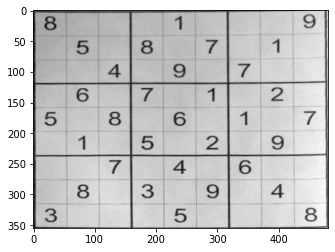

In [254]:
plt.imshow(warped,cmap='gray')

In [255]:
board=np.zeros([9,9],dtype='int')

In [256]:
stepX = warped.shape[1] // 9
stepY = warped.shape[0] // 9


In [257]:
cellLocs=[]
for y in range(0,9):
    row=[]
    
    for x in range(0,9):
        startX = x * stepX
        startY = y * stepY
        endX=(x+1) * stepX
        endY=(y+1) * stepY
        
        row.append((startX,startY,endX,endY))
        
        cell=warped[startY:endY,startX:endX]
        digit=extract_digit(cell,debug=False)
        
        if digit is not None:
            roi = cv2.resize(digit, (28, 28))
            roi = roi.astype("float") / 255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)
            
            pred=model.predict(roi).argmax(axis=1)[0]
            
            board[y,x]=pred
            
    cellLocs.append(row)
            
        
        


In [258]:
board

array([[8, 0, 0, 0, 1, 0, 0, 0, 9],
       [0, 5, 0, 8, 0, 7, 0, 1, 0],
       [0, 0, 4, 0, 9, 0, 7, 0, 0],
       [0, 6, 0, 7, 0, 1, 0, 2, 0],
       [5, 0, 8, 0, 6, 0, 1, 0, 7],
       [0, 1, 0, 5, 0, 2, 0, 9, 0],
       [0, 0, 7, 0, 4, 0, 6, 0, 0],
       [0, 8, 0, 3, 0, 9, 0, 4, 0],
       [3, 0, 0, 0, 5, 0, 0, 0, 8]])

In [259]:
sudoku_solver(board)

---


array([[8, 7, 2, 4, 1, 3, 5, 6, 9],
       [9, 5, 6, 8, 2, 7, 3, 1, 4],
       [1, 3, 4, 6, 9, 5, 7, 8, 2],
       [4, 6, 9, 7, 3, 1, 8, 2, 5],
       [5, 2, 8, 9, 6, 4, 1, 3, 7],
       [7, 1, 3, 5, 8, 2, 4, 9, 6],
       [2, 9, 7, 1, 4, 8, 6, 5, 3],
       [6, 8, 5, 3, 7, 9, 2, 4, 1],
       [3, 4, 1, 2, 5, 6, 9, 7, 8]])

In [260]:
for (cellRow,boardRow) in zip(cellLocs,board):
    for (box,digit) in zip(cellRow,boardRow):
        startX,startY,endX,endY=box
        
        textX=int((endX-startX)*0.33)
        textY=int((endY-startY)*-0.2)
        textX+=startX
        textY+=endY
        
        cv2.putText(warped,str(digit),(textX,textY),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,255,255),2)
        

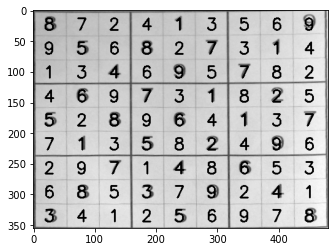

In [261]:
plt.imshow(warped,cmap='gray')